# US Population EDA and Time Series

### Import our modules

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


### Import our dataset

In [107]:
popfull = pd.read_csv('POPH.csv', parse_dates=True)

popfull = popfull[ popfull['date'] < '1980' ]


In [108]:
pop = popfull.drop(columns= ['realtime_start','realtime_end'] )

Lets take a quick look at our time series and see if its stationary and if it has a seasonality component to it.

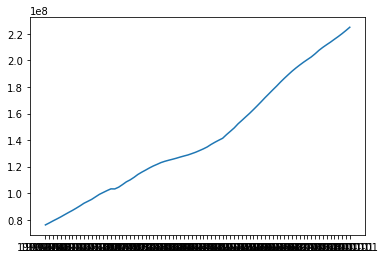

In [114]:
# Plot and show the time series on axis ax1

plt.plot(pop['date'],pop['value'])
plt.autoscale(enable=True, axis='both', tight=False)


#fig, ax1 = plt.subplots()
#pop.plot(ax=ax1)
plt.show()

Looks like our model is not stationary. Lets get run the adfuller test for non stionality just to see what we are workign with. After that, let's try taking some differencing until our time series is stationary

In [110]:
# Run ADF test on the differenced time series
result = adfuller(pop['value'])


# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 1.4402632114411702
p-value: 0.997289591025368


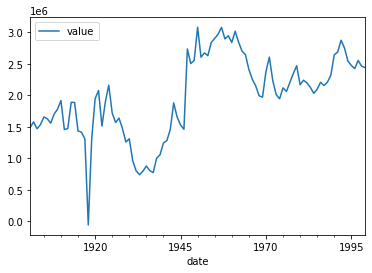

In [83]:
pop_stationary = pop.diff().dropna()

fig, ax = plt.subplots()
pop_stationary.plot(ax=ax)
plt.show()

It would appear taking one difference was not enough. Lets see what the stats tell us. If we cannot reject the null that the test series is non stationary, lets try differencing again

In [84]:
# Run ADF test on the differenced time series
result = adfuller(pop_stationary['value'])


# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.6826899511812292
p-value: 0.4400524762232928


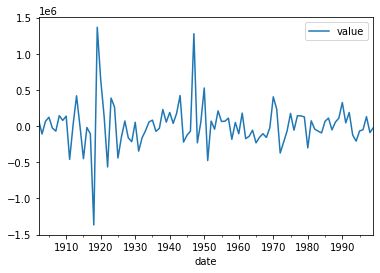

In [76]:
pop_stationary = pop.diff().diff().dropna()

fig, ax = plt.subplots()
pop_stationary.plot(ax=ax)
plt.show()



Looks like taking one difference is not quite enough enough. Lets try it again and see if that address the stationality issue

That looks much better. Lets see if we can some quanativie assurance that the time series is now stationary

In [77]:
# Run ADF test on the differenced time series
result = adfuller(pop_stationary['value'])


# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -9.415643073152577
p-value: 5.679169562683719e-16


Excellent! We can reject the null that our time series is NOT stationary and can proceed to fit an SARIMA model.

-9.415643073152577
5.679169562683719e-16
{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}
